# <center> Lending Club Case Study


## Table of Content

1. [Introduction](#Introduction)
2. [Important Settings](#Important-Settings)
3. [Data Understanding](#Data-Understanding)  
4. [Data Cleaning and Manipulation](#Data-Cleaning-and-Manipulation)
    1. [Dropping Data](#Dropping-Data)
    2. [Formatting Data](#Formatting-Data)
    3. [Derived Data](#Derived-Data)
5. [Data Analysis](#Data-Analysis)
    1. [Univariable Analysis](#Univariable-Analysis)
    2. [Bivariable Analysis](#Bivariable-Analysis)
6. [Presentation and Recommendations](#Presentation-and-Recommendations)
7. [Conciseness and Readability of the Code](#Conciseness-and-Readability-of-the-Code)


# Introduction 

### Group members:
* Pavan Narra (https://github.com/pavan440)
* Jheser Guzman (https://github.com/dicotips)

## Business Understanding

**Source:** UpGrad Assignment description

*You work for a **consumer finance** company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:*

* *If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company*

* *If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company*

*The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.*

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

  * **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

  * **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  * **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)



# Important Settings

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignore version warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the format of Float numbers to two digits.
pd.options.display.float_format = '{:.2f}'.format 

In [3]:
# Reading CSV file with dtype object and saving it in raw_data dataframe. 
# All the processing in the data will be stored in new dataframes

# Set Dataset File Path
DATA_FILE_PATH = '_dataset/loan.csv'

raw_data = pd.read_csv(DATA_FILE_PATH, dtype=object)

## Data Understanding
* All data quality issues are correctly identified and reported. 
* Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.

In [4]:
# Getting the first 5 rows from the raw_data dataframe for data exploration
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
# Understanding the structure of the dataset
# Checking shape & datatype of raw_data dataframe
print(raw_data.shape)
print(raw_data.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


In [6]:
print(raw_data.dtypes)

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [7]:
# We verify if there is any dublicated rows in ['id', 'member_id']

print(raw_data.duplicated(subset=None, keep='first').count())
sum(raw_data.duplicated(['id']))

## Result: There are no duplicated IDs !!!

39717


0

In [8]:
print(raw_data.duplicated(subset=None, keep='first').count())
sum(raw_data.duplicated(['member_id']))

## Result: There are no duplicated member_ids !!!

39717


0

In [9]:
# Checking how many rows have all missing values
empty_rows = raw_data.isnull().all(axis=1).sum()
print(f'N Empty Rows: {empty_rows}')

## Result: There are 54 columns have all missing values.

N Empty Rows: 0


In [10]:
# Checking how many columns have all missing values
empty_columns = raw_data.isnull().all(axis=0).sum()
print(f'N Empty Columns: {empty_columns}')

## Result: There are 54 columns with no data in it (all data is null in those columns).

N Empty Columns: 54


In [11]:
# Counting Nulls in each column
raw_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Data Cleaning and Manipulation

* Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 
* If applicable, data is converted to a suitable and convenient format to work with using the right methods.
* Manipulation of strings and dates is done correctly wherever required.

### Dropping Data

In [12]:
# Verifying how much memory is used by raw_data dataframe
raw_data_size_mb = format(sys.getsizeof(raw_data) /(1028**2), '.0f')

print(f'Raw_Data Memory Usage: {raw_data_size_mb}MB')

Raw_Data Memory Usage: 207MB


In [13]:
# Creating a copy of 'raw_data' to clean & transform data
## Dropping columns with all null values
columuns_all_null = raw_data.columns[raw_data.isnull().sum() == raw_data.shape[0]]
print(columuns_all_null)

cleaned_data = raw_data.drop(columns=columuns_all_null) 

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [14]:
# Counting Nulls in each column

cleaned_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
# Droping additional columns we don't need since these are mostly nulls.
## Creating a list of Column names to be dropped
drop_columns = []

# * 'desc' is a plain text of description. It will not needed in this analysis
drop_columns.append('desc')
print(drop_columns)
cleaned_data.desc.head()

['desc']


0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [16]:
# Dropping following columns since they have too many Null values.
drop_columns.extend(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"])
print(cleaned_data.mths_since_last_delinq.value_counts())
print(cleaned_data.mths_since_last_record.value_counts())
print(cleaned_data.next_pymnt_d.value_counts())

0      443
15     252
23     247
30     247
24     241
      ... 
85       1
106      1
95       1
107      1
115      1
Name: mths_since_last_delinq, Length: 95, dtype: int64
0      670
104     61
89      60
113     59
111     57
      ... 
12       1
19       1
6        1
5        1
46       1
Name: mths_since_last_record, Length: 111, dtype: int64
Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64


In [17]:
# Dropping 
cleaned_data.isnull().sum()
print(cleaned_data.shape)

(39717, 57)


In [18]:
cleaned_data.drop(columns=drop_columns, inplace=True)
print(cleaned_data.shape)

(39717, 53)


In [19]:
# Dropping columns with all different values. They will not add value to the analysis.
## Dropping 'id' column
drop_columns = ['id']
print('id different values: ', end='')
print(cleaned_data.id.value_counts().count())

## Dropping 'member_id' column
drop_columns.append('member_id')
print('member_id different values: ', end='')
print(cleaned_data.member_id.value_counts().count())

## Dropping 'url' column since it has all different values
drop_columns.append('url')
print('url different values: ' , end='')
print(cleaned_data.url.value_counts().count())

id different values: 39717
member_id different values: 39717
url different values: 39717


In [20]:
# Dropping 'tax_liens' column since it has only one value 0
drop_columns.append('tax_liens')
print('tax_liens value count: ', end='')
print(cleaned_data.tax_liens.value_counts())

# Dropping 'emp_title' since it has too many different discrete values
drop_columns.append('emp_title')
print('emp_title different values: ' , end='')
print(cleaned_data.emp_title.value_counts().count())

# Dropping 'zip_code' since the dataset is too small for the universe of zip_codes in the country
drop_columns.append('zip_code')

tax_liens value count: 0    39678
Name: tax_liens, dtype: int64
emp_title different values: 28820


In [21]:
cleaned_data.drop(columns=drop_columns, inplace=True)

In [22]:
# After cleaning all the irrelevant columns for the analysis, we are left with a dataframe of 47 columns

cleaned_data.shape

(39717, 47)

### Formatting Data

In [23]:
# Exploring the dataset data-types before any format change
cleaned_data.dtypes

loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
term                          object
int_rate                      object
installment                   object
grade                         object
sub_grade                     object
emp_length                    object
home_ownership                object
annual_inc                    object
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
addr_state                    object
dti                           object
delinq_2yrs                   object
earliest_cr_line              object
inq_last_6mths                object
open_acc                      object
pub_rec                       object
revol_bal                     object
revol_util                    object
total_acc                     object
i

In [24]:
# Formatting employment length column to have only numbers. Filling NaN with 0s.
cleaned_data.emp_length.fillna('0',inplace=True)
cleaned_data['emp_length'] = cleaned_data.emp_length.str.extract('(\d+)')
cleaned_data.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [25]:
# pub_rec_bankruptcies is cleaned.
print("Before:", end='')
print(cleaned_data.pub_rec_bankruptcies.isnull().sum())

print("After:", end='')
cleaned_data.pub_rec_bankruptcies.fillna('Not Known', inplace=True)
print(cleaned_data.pub_rec_bankruptcies.isnull().sum())

Before:697
After:0


In [26]:
# Removing % symbol from 'int_rate' column to have numeric values
cleaned_data['int_rate'] = cleaned_data.int_rate.str.rstrip('%')

# Rmoving % symbol from 'revol_util' column to have numeric values
cleaned_data['revol_util'] = cleaned_data.revol_util.str.rstrip('%')

In [27]:
# Convert amount columns into numeric data.

amnt_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
cleaned_data[amnt_columns] = cleaned_data[amnt_columns].apply(pd.to_numeric)

### Derived Data

In [28]:
# Deriving two new columns based Month and Year of 'issue_d' column

cleaned_data.issue_d = pd.to_datetime(cleaned_data.issue_d, format='%b-%y')
cleaned_data['year'] = cleaned_data['issue_d'].dt.year
cleaned_data['month'] = cleaned_data['issue_d'].dt.month

cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,...,May-16,0,1,INDIVIDUAL,0,0,0,0,2011,12
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,...,Sep-13,0,1,INDIVIDUAL,0,0,0,0,2011,12
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,...,May-16,0,1,INDIVIDUAL,0,0,0,0,2011,12
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,...,Apr-16,0,1,INDIVIDUAL,0,0,0,0,2011,12
4,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,RENT,...,May-16,0,1,INDIVIDUAL,0,0,0,0,2011,12


In [29]:
# Final 'clean_data' dataframe
# Verifying how much memory is used by cleaned_data dataframe
cleaned_data_size_mb = format(sys.getsizeof(cleaned_data) /(1028**2), '.0f')

print(f'Cleaned_Data Memory Usage: {cleaned_data_size_mb}MB')

## We are using almost half of the space in memory compared against raw_data

Cleaned_Data Memory Usage: 89MB


In [32]:
# Final 'clean_data' dataframe and their datatypes
cleaned_data.dtypes

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                           object
earliest_cr_line                      object
inq_last_6mths                        object
open_acc  

## Data Analysis

* The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.
* Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).
* Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis. The explanation for creating the derived metrics is mentioned and is reasonable.
* Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense. 
* The most useful insights are explained correctly in the comments.
* Appropriate plots are created to present the results of the analysis. The choice of plots for respective cases is correct. The plots should clearly present the relevant insights and should be easy to read. The axes and important data points are labelled correctly.

### Univariable Analysis

In [33]:
# Exploring 'loan_status' variable values

cleaned_data.loan_status.value_counts() * 100 / len(cleaned_data)
## Analysis:
# 82.96% of loans were "Fully Paid".
# 14.17% of loans were "Charged Off"

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [34]:
# Exploring 'purpose' variable values

cleaned_data.purpose.value_counts() * 100 / len(cleaned_data)

## Analysis:  
# Most of the loans are about "debt consolidation" (46.93%)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [40]:
# Quantitative Variables - Basic Stats
cleaned_data.describe()

## Analysis:
## 'loan_amnt', 'funded_amnt', and 'funded_amnt_inv' are not the same.
## 'annual_inc' has outliers

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,year,month
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,10397.45,12.02,324.56,4.95,68968.93,13.32,12153.60,2010.33,7.17
std,7456.67,7187.24,7128.45,3.72,208.87,3.46,63793.77,6.68,9042.04,0.88,3.40
min,500.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,2007.00,1.00
25%,5500.00,5400.00,5000.00,9.25,167.02,2.00,40404.00,8.17,5576.93,2010.00,4.00
50%,10000.00,9600.00,8975.00,11.86,280.22,4.00,59000.00,13.40,9899.64,2011.00,7.00
75%,15000.00,15000.00,14400.00,14.59,430.78,9.00,82300.00,18.60,16534.43,2011.00,10.00
max,35000.00,35000.00,35000.00,24.59,1305.19,10.00,6000000.00,29.99,58563.68,2011.00,12.00


<AxesSubplot:>

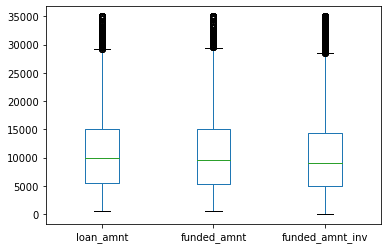

In [65]:
# Plotting 'loan_ammnt' columns
cleaned_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].plot.box()

<AxesSubplot:xlabel='annual_inc'>

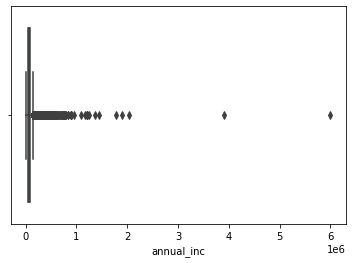

In [67]:
# Plotting 'annual_inc'
sns.boxplot(cleaned_data.annual_inc)

In [69]:
# Removing outliers from 'annual_inc' in the quantile .99
print('Before  Outliers Removal:\n')
print(cleaned_data.annual_inc.describe())

cleaned_data = cleaned_data[cleaned_data.annual_inc < cleaned_data.annual_inc.quantile(0.99)]

print('\nAfter Outliers Removal :')
print(cleaned_data.annual_inc.describe())



Before  Outliers Removal:

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

After Outliers Removal :
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

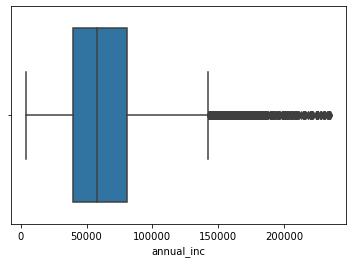

In [70]:
# Plotting 'annual_inc' after Outlier removal
sns.boxplot(cleaned_data.annual_inc)

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

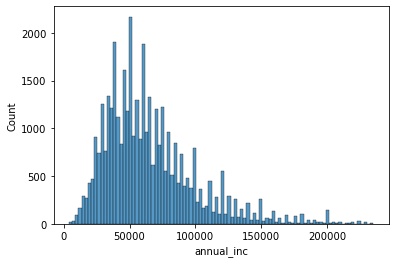

In [71]:
# Plotting 'annual_inc'
sns.histplot(cleaned_data.annual_inc)

### Bivariable Analysis

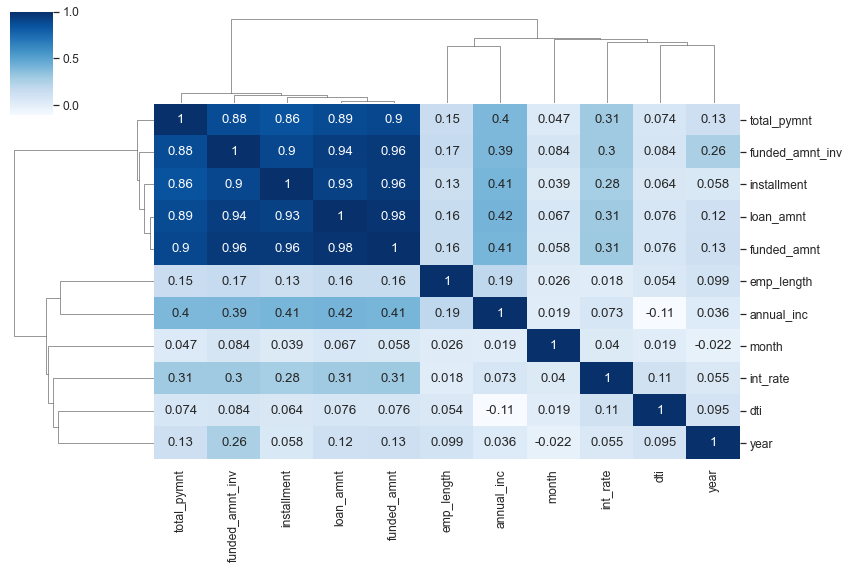

In [76]:
# Plotting Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
## This matrix gives us a first impression of the relation of the numeric variables

corr = cleaned_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

## Description:
## * As mentioned before: Loan amount, investor amount, funding amount are strongly correlated.
## * Annual_income is negatively correlated to DTI(Debt-to-income ratio).
## * Positive correlation between annual income and employment years.

## Presentation and Recommendations

* The presentation has a clear structure, is not too long, and explains the most important results concisely in simple language.
* The recommendations to solve the problems are realistic, actionable and coherent with the analysis. 
* The GitHub repository link contains a python file, presentation file and a README.md file. README.md file should describe the project briefly.
* If any assumptions are made, they are stated clearly.

## Conciseness and Readability of the Code
* The code is concise and syntactically correct. Wherever appropriate, built-in functions and standard libraries are used instead of writing long code (if-else statements, for loops, etc.).
* Custom functions are used to perform repetitive tasks.
* The code is readable with appropriately named variables and detailed comments are written wherever necessary.